In [2]:
#MASTER

In [2]:
#import all necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport

In [ ]:
#########################################################################Nadine download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","DMDSAA","data","donors.csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0)

In [51]:
#top 5 rows of dataset for visualization
donors.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,7.481481,15078,1,L,4,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,6.812500,172556,1,L,4,E,X,X,X,C
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112,1,L,2,F,X,X,X,A


In [52]:
#shape of dataset so number of rows and columns
donors.shape

(95412, 475)

In [30]:
#checking the null values in each column
donors.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 0 to 95411
Data columns (total 475 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ODATEDW   95412 non-null  object 
 1   OSOURCE   95412 non-null  object 
 2   TCODE     95412 non-null  int64  
 3   STATE     95412 non-null  object 
 4   ZIP       95412 non-null  object 
 5   MAILCODE  95412 non-null  object 
 6   PVASTATE  95412 non-null  object 
 7   DOB       71529 non-null  object 
 8   NOEXCH    95412 non-null  object 
 9   RECINHSE  95412 non-null  object 
 10  RECP3     95412 non-null  object 
 11  RECPGVG   95412 non-null  object 
 12  RECSWEEP  95412 non-null  object 
 13  MDMAUD    95412 non-null  object 
 14  DOMAIN    95412 non-null  object 
 15  HOMEOWNR  95412 non-null  object 
 16  CHILD03   95412 non-null  object 
 17  CHILD07   95412 non-null  object 
 18  CHILD12   95412 non-null  object 
 19  CHILD18   95412 non-null  object 
 20  NUMCHLD   12386 non-null  f

In [8]:
#checking the data types 
donors.dtypes

ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 475, dtype: object

In [9]:
#count of missing values
donors.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 475, dtype: int64

In [10]:
#checking for duplicated observations
donors.duplicated().sum()

0

In [11]:
#descriptive statistics
donors.describe(include="all")

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,...,95412.000000,95412.000000,95412.000000,95412,95412.000000,95412,95412,95412,95412,95280
unique,54,896,NaN,57,19938,2,3,847,6,2,...,NaN,NaN,NaN,1,NaN,4,5,4,5,5
top,2015-01-01,MBC,NaN,CA,85351,,,1968-01-01,0,,...,NaN,NaN,NaN,L,NaN,F,X,X,X,A
freq,15358,4539,NaN,17343,61,94013,93954,1479,61203,88709,...,NaN,NaN,NaN,95412,NaN,46964,95118,95118,95118,34484
mean,NaN,NaN,54.223117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.347786,95778.176959,0.500618,NaN,1.910053,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,953.844476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.769997,55284.596094,0.500002,NaN,1.072749,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.285714,1.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.384615,47910.750000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.636364,95681.500000,1.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.477955,143643.500000,1.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Pandas profiling
ProfileReport(donors, minimal=True)

In [53]:
#Based on previous analysis, we will drop the following columns (justification provided in report appendix??)

donors.drop(['PVASTATE','NOEXCH','HOMEOWNR','MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','GEOCODE','LIFESRC','NEXTDATE','HPHONE_D','GEOCODE2'], axis=1,inplace=True)

#drop all ADATE columns except ADATE_2
donors.drop(['ADATE_3','ADATE_4','ADATE_5','ADATE_6','ADATE_7','ADATE_8','ADATE_9','ADATE_10','ADATE_11','ADATE_12','ADATE_13','ADATE_14','ADATE_15','ADATE_16','ADATE_17','ADATE_18','ADATE_19','ADATE_20','ADATE_21','ADATE_22','ADATE_23','ADATE_24'], axis=1,inplace=True)

#drop all the RFA columns
donors.drop(['RFA_2','RFA_3','RFA_4','RFA_5','RFA_6','RFA_7','RFA_8','RFA_9','RFA_10','RFA_11','RFA_12','RFA_13','RFA_14','RFA_15','RFA_16','RFA_17','RFA_18','RFA_19','RFA_20','RFA_21','RFA_22','RFA_23','RFA_24'], axis=1,inplace=True)

#drop all the RDATE columns
donors.drop(['RDATE_3','RDATE_4','RDATE_5','RDATE_6','RDATE_7','RDATE_8','RDATE_9','RDATE_10','RDATE_11','RDATE_12','RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_17','RDATE_18','RDATE_19','RDATE_20','RDATE_21','RDATE_22','RDATE_23','RDATE_24'], axis=1,inplace=True)

#drop all the RAMNT columns
donors.drop(['RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6','RAMNT_7','RAMNT_8','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_12','RAMNT_13','RAMNT_14','RAMNT_15','RAMNT_16','RAMNT_17','RAMNT_18','RAMNT_19','RAMNT_20','RAMNT_21','RAMNT_22','RAMNT_23','RAMNT_24'], axis=1,inplace=True)


In [54]:
#check that the columns were dropped successfully
donors.shape

(95412, 371)

In [55]:
#clean up the ZIP column by getting rid of the '-' at the beginning of each entry and replacing it with nothing
donors['ZIP']=donors['ZIP'].str.replace("-","")
donors['ZIP'].head()

#check if converts to integer successfully, it means all '-'symbols were removed
donors['ZIP']=donors['ZIP'].astype(int)
donors['ZIP'].dtypes

dtype('int32')

In [56]:
#check the type of the DOB column
donors['DOB'].dtypes #it's a string

#treat the DOB to only show the year with without the day or month
donors['DOB'] = donors['DOB'].str[:4]

donors['DOB'].head()

0    1957
1    1972
2     NaN
3    1948
4    1940
Name: DOB, dtype: object

In [57]:
#treat the RECPGVG column to have 0s and 1s instead of blanks and Xs

#check the type of the RECPGVG column
donors['RECPGVG'].dtypes    #it's a string 

#replace all blank rows in the RECPGVG with 0
donors['RECPGVG']=donors['RECPGVG'].str.replace(" ","0")

#replace all X rows in the RECINHSE with 1
donors['RECPGVG']=donors['RECPGVG'].str.replace("X","1")

#typecast it into an integer for later use
donors['RECPGVG']=donors['RECPGVG'].astype(int)
donors['RECPGVG'].dtypes

#check that it now only includes values 0 and 1
donors['RECPGVG'].value_counts()

0    95298
1      114
Name: RECPGVG, dtype: int64

In [58]:
#treat the RECSWEEP column to have 0s and 1s instead of blanks and Xs

#check the type of the RECSWEEP column
donors['RECSWEEP'].dtypes    #it's a string 

#replace all blank rows in the RECSWEEP with 0
donors['RECSWEEP']=donors['RECSWEEP'].str.replace(" ","0")

#replace all X rows in the RECSWEEP with 1
donors['RECSWEEP']=donors['RECSWEEP'].str.replace("X","1")

#typecast it into an integer for later use
donors['RECSWEEP']=donors['RECSWEEP'].astype(int)
donors['RECSWEEP'].dtypes

#check that it now only includes values 0 and 1
donors['RECSWEEP'].value_counts()

0    93795
1     1617
Name: RECSWEEP, dtype: int64

In [59]:
#replace blanks, C, and A in gender column with U as they are all unknown values
donors['GENDER']=donors['GENDER'].str.replace(" ","U")
donors['GENDER']=donors['GENDER'].str.replace("C","U")
donors['GENDER']=donors['GENDER'].str.replace("A","U")

#check that it now only includes values that are listed/categorized in the meta data
donors['GENDER'].value_counts()

F    51277
M    39094
U     4676
J      365
Name: GENDER, dtype: int64

In [60]:
#treat the PEPSTRFL column to have 0s and 1s instead of blanks and Xs

#check the type of the PEPSTRFL column
donors['PEPSTRFL'].dtypes    #it's a string 

#replace all blank rows in the PEPSTRFL with 0
donors['PEPSTRFL']=donors['PEPSTRFL'].str.replace(" ","0")

#replace all X rows in the PEPSTRFL with 1
donors['PEPSTRFL']=donors['PEPSTRFL'].str.replace("X","1")

#typecast it into an integer for later use
donors['PEPSTRFL']=donors['PEPSTRFL'].astype(int)
donors['PEPSTRFL'].dtypes

#check that it now only includes values 0 and 1
donors['PEPSTRFL'].value_counts()

0    50143
1    45269
Name: PEPSTRFL, dtype: int64

In [61]:
#create a column called Tenure which has the number of years a donor has been donating to PVA 

#subtract the year of the first date a donor donated to PVA from this year (2020) and turn this number to a float since
#there are many NaN values in the FISTDATE column which cannot be typecasted into an integer
donors['Tenure'] = 2020 - donors['FISTDATE'].str[:4].astype(float)

donors['Tenure'].head()

0    11.0
1     7.0
2    10.0
3    13.0
4    21.0
Name: Tenure, dtype: float64

In [62]:
#drop FISTDATE since it's not as informative after the feature engineering of the tenure column
donors.drop(['FISTDATE'],axis=1,inplace=True)

In [63]:
#check to see the column Tenure was added and FISTDATE was deleted
donors.columns.values 

array(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'DOB',
       'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN',
       'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'NUMCHLD', 'INCOME',
       'GENDER', 'WEALTH1', 'HIT', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN',
       'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP',
       'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS',
       'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL', 'POP901',
       'POP902', 'POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4',
       'POP90C5', 'ETH1', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7',
       'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14',
       'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905',
      

In [44]:
###### MARTAAAA

In [45]:
#########################################################################Marta download
#load the csv file and save it into the dataframe donors
donors=pd.read_csv(r"C:\Users\marta\Documents\Big data\NOVA IMS\20202021\1st Semester\Data Mining\Project\donors.csv",index_col = 0)

FileNotFoundError: [Errno 2] File C:\Users\marta\Documents\Big data\NOVA IMS\20202021\1st Semester\Data Mining\Project\donors.csv does not exist: 'C:\\Users\\marta\\Documents\\Big data\\NOVA IMS\\20202021\\1st Semester\\Data Mining\\Project\\donors.csv'

In [64]:
#treat the column CHILD03,CHILD07, CHILD12, CHILD18  in order to have 0, 1 and 2 instead of blank, M, F and B, respectively and then create a new variable by summing them, called number_child. Remove column NUMCHLD

#replace the letters under the column CHILD03 by the correspondent numbers
donors.replace({"CHILD03": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

#confirm that the change was rightly made
donors["CHILD03"].unique()

#replace the letters under the column CHILD07 by the correspondent numbers
donors.replace({"CHILD07": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

#confirm that the change was rightly made
donors["CHILD07"].unique()

#replace the letters under the column CHILD12 by the correspondent numbers 
donors.replace({"CHILD12": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

#confirm that the change was rightly made
donors["CHILD12"].unique()

#replace the letters under the column CHILD18 by the correspondent numbers 
donors.replace({"CHILD18": {"B":2,"M":1,"F": 1," ":0}}, inplace=True)

#confirm that the change was rightly made
donors["CHILD18"].unique()
 
#create a new variable named number_child that will sum the values per row under CHILD03,CHILD07, CHILD12, CHILD18 columns in order to create our variable that informs on the number of children per donor
donors["number_child"]=donors[["CHILD03","CHILD07","CHILD12","CHILD18"]].sum(axis=1)

#percentage of values that remained the same when comparing the variable NUMCHLD and the one created by us, number_child
compare_numchild_number_child = np.where(donors["NUMCHLD"] == donors["number_child"], True, False)
np.sum(compare_numchild_number_child *1)/len(donors) # the percentage is 88,054%

#shows the difference between values under the columns  NUMCHLD and number_child
diff = donors['NUMCHLD'] - donors['number_child']
diff.value_counts() #84014 rows are equal between the 2 columns

# drop column NUMCHLD
donors.drop(["NUMCHLD"],axis=1,inplace=True)

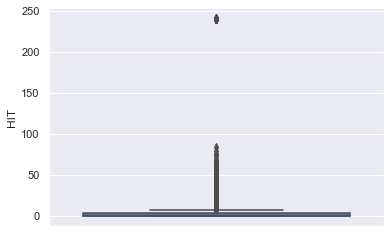

<Figure size 2160x1080 with 0 Axes>

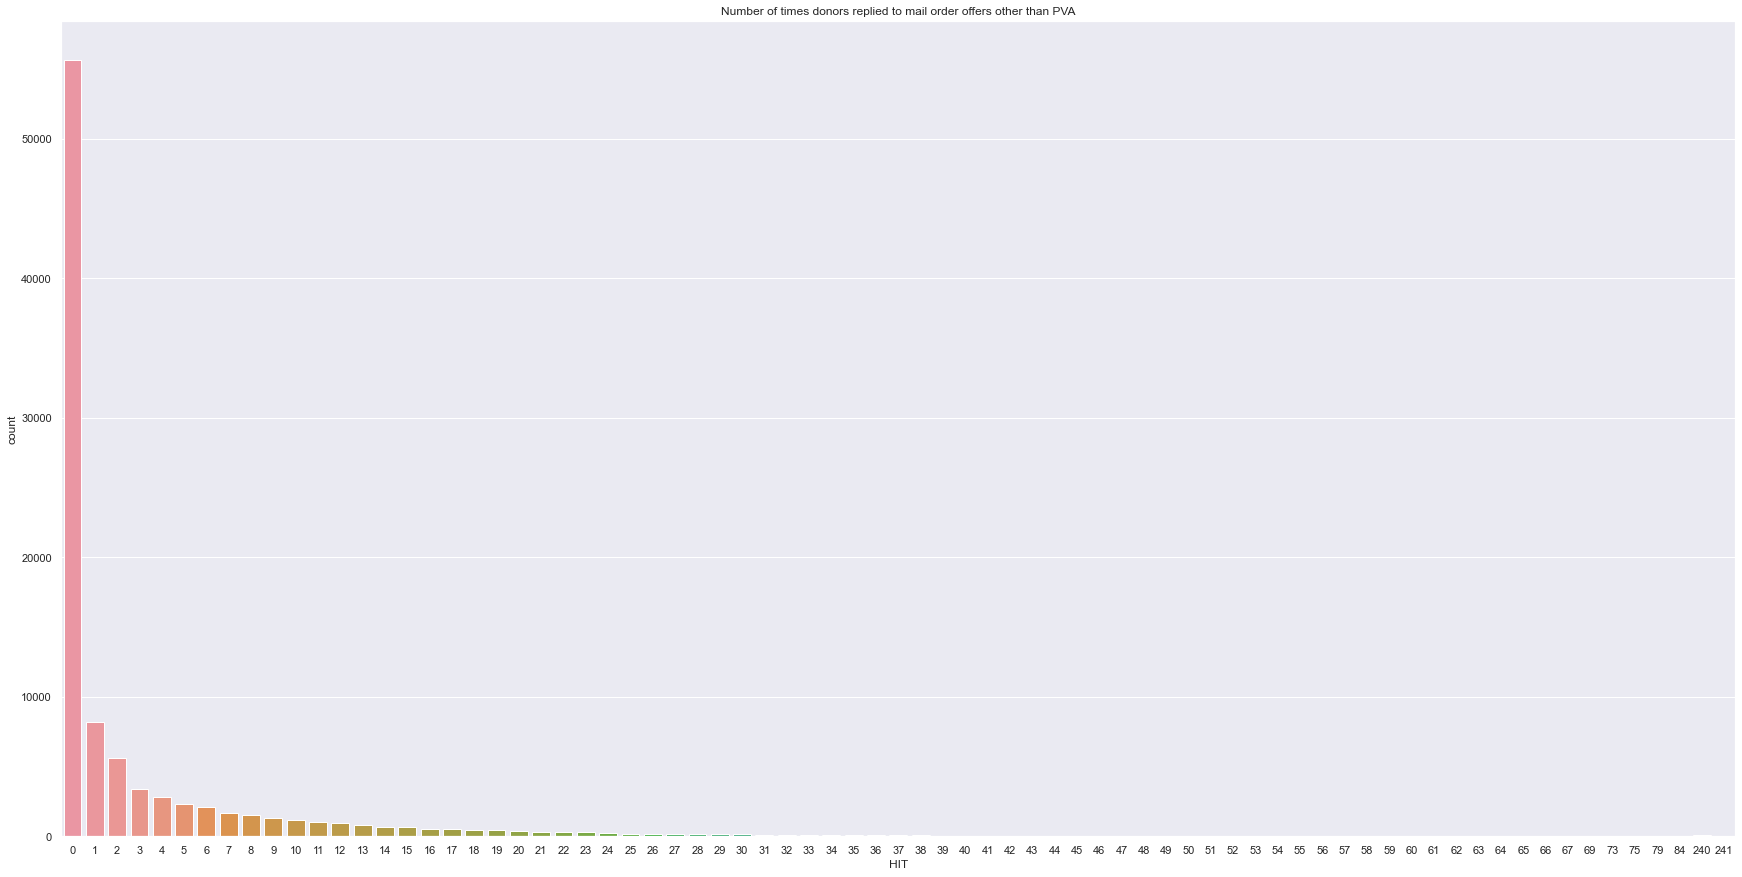

Percentage of data kept after removing outliers: 0.8571
Percentage of data kept after removing outliers: 0.9893
Percentage of data kept after removing outliers: 0.9992


In [65]:
# treat column HIT in order to analyse the presence of outliers

#create a boxplot for the variable HIT
sns.boxplot(y=donors["HIT"])
plt.figure(figsize=(30,15))

plt.show()

#create a histogram for the variable HIT
sns.set() 
plt.figure(figsize=(30,15))

sns.countplot(x=donors["HIT"])
plt.title("Number of times donors replied to mail order offers other than PVA")

plt.show() #The hits of 32 to 241 account for a very low number of donors

#assessment of outliers with interquartile range
q25 = donors[["HIT"]].quantile(.25)
q75 = donors[["HIT"]].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters3 = []
for metric in donors[["HIT"]]:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters3.append(donors["HIT"].between(llim, ulim, inclusive=True))

filters3 = pd.Series(np.all(filters3, 0))
my_project_f3 = donors[filters3]

#how much data is kept with interquartile range
print('Percentage of data kept after removing outliers:', np.round(my_project_f3.shape[0] / donors.shape[0], 4))

#detect outliers manually by limiting the number of replies to 31
filters1 = ((donors["HIT"]<=31))
my_project_noutliers = donors[filters1]

# how much data is kept if we limit the number of replies to 31
print('Percentage of data kept after removing outliers:', np.round(my_project_noutliers.shape[0] / donors.shape[0], 4))

#detect outliers manually by limiting the number of replies to 84
filters2 = ((donors["HIT"]<=84))
my_project_f2 = donors[filters2]

#how much data is kept if we limit the number of replies to 84
print('Percentage of data kept after removing outliers:', np.round(my_project_f2.shape[0] / donors.shape[0], 4))

# decide on keeping only the donors who reply until 31 times
donors= donors[filters1]


In [122]:
# treat the column SOLP3 so it is possible to integrate the information in the column RECP3 and then delete it, this will happen by distinguishing between donors that are not in P3 program and the ones who can receive always emails

#number of elements under column SOLP3 have a correspondent blank value under RECP3, meaning they represent donors who are not in P3 program.
donors[["RECP3","SOLP3"]].groupby(by=["RECP3"]).count()

#number of blank cells under SOLP3 which can account for missing values,donors who can be mailed as many times as we want or not member of P3 program. .
donors["SOLP3"].isin([" "]).sum(axis=0)

#index of the donors who don't belong to P3 program because they have a blank value under RECP3
grouped= donors[["RECP3","SOLP3"]].groupby(by=["RECP3"]).get_group(" ").index

#transform the values under the column SOLP3  correspondent to the above axis in -1
solp31=donors.loc[grouped]["SOLP3"].replace(" ",-1)

#index of the donors who  belong to P3 program because they have a X under RECP3
grouped1=donors[["RECP3","SOLP3"]] .groupby(by=["RECP3"]).get_group("X").index

#transform the donors under SOLP3 correspondent to the above axis and assume that they can be mailed as many times as we want to the number 12
solp32=donors.loc[grouped1]["SOLP3"].replace(" ",12)

#return the column SOLP3 with the necessary changes
donors["SOLP3"]=pd.concat([solp31,solp32])

#confirm the values under SOLP3
donors["SOLP3"].unique()

#transform the strings in integer
donors.replace({"SOLP3": {"00":0,"12":12,"01": 1,"02":2}}, inplace=True)

#confirm the values under SOLP3
donors["SOLP3"].unique()

#drop the column RECP3
donors.drop(["RECP3"], axis=1,inplace=True)

In [121]:
#treat column SOLIH so it is possible to integrate the information in the column RECINHSE and then delete it, this will happen by distinguishing between donors that are not in IN House program and the ones who can receive always emails

#number of elements under column SOLIH have a correspondent blank value under RECINHSE, meaning they represent donors who are not inHouse program.
donors[["RECINHSE","SOLIH"]].groupby(by=["RECINHSE"]).count()

#index of the donors who don't belong to In House  program because they have a blank value under RECINHSE
SOLIHg_index1= donors.loc[donors['RECINHSE']==' '].index.values

#transform the donors who don't belong to In House program under SOLIH in -1.
SOLIH1=donors.loc[SOLIHg_index1]["SOLIH"].replace(" ",-1)

#index of the donors who  belong to In House program because they have a X under RECINHSE
SOLIHg_index2=donors.loc[donors['RECINHSE']=='X'].index.values

#transform the donors under SOLIH" correspondent to the above axis and assume that they can be mailed as many times as we want to the number 12
SOLIH2=donors.loc[SOLIHg_index2]["SOLIH"].replace(" ",12)

#return the column SOLIH with the necessary changes
donors["SOLIH"]=pd.concat([SOLIH1,SOLIH2])

#confirm the values under SOLIH
donors["SOLIH"].unique()

#transform the strings in integer
donors.replace({"SOLIH": {"00":0,"12":12,"01":1,"02":2,"03":3,"04":4,"06":6}}, inplace=True)

#confirm the values under SOLIH
donors["SOLIH"].unique()

#drop the column RECINHSE
donors.drop(["RECINHSE"], axis=1,inplace=True)

In [74]:
#treat column MAJOR to see if the information matches the one in the column  MDMAUD, regarding no major donors, and if yes delete MAJOR

#check if all the donors with blank cells (not a major donor) under MAJOR correspond a donors with X value (meaning not a major donor) under  MDMAUD
donors.loc[donors["MAJOR"] ==" "][["MDMAUD"]] ["MDMAUD"].value_counts() #We can conclude that all blank values under column Major (that represent the not major donor) have a correspondent X in the column MDMAUD, so the column Major can be deleted 

#drop column MAJOR
donors.drop("MAJOR",axis=1, inplace=True)

In [ ]:
###### BIAAAA

In [50]:
#########################################################################Bia download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","Project","donors.csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0)

C:\Users\betty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [93]:
# Relation of WEALTH1 and INCOME
print(donors['WEALTH1'].unique(),donors['INCOME'].unique())
print(donors['WEALTH1'].isna().sum(),donors['INCOME'].isna().sum())
donors[['WEALTH1','INCOME']]

[nan  9.  1.  4.  6.  2.  0.  5.  8.  3.  7.] [nan  6.  3.  1.  4.  2.  7.  5.]
44732 21286


,WEALTH1,INCOME
0,NaN,NaN
1,9.0,6.0
2,1.0,3.0
3,4.0,1.0
5,NaN,NaN
...,...,...
95407,NaN,NaN
95408,9.0,7.0
95409,NaN,NaN
95410,NaN,7.0


In [124]:
donors.groupby(['WEALTH1'])['INCOME'].value_counts().unstack()

INCOME,1.0,2.0,3.0,4.0,5.0,6.0,7.0
WEALTH1,,,,,,,
0.0,867,618,257,272,221,67,63
1.0,881,1053,423,477,357,111,93
2.0,827,1169,553,638,556,152,116
3.0,694,1101,595,685,744,203,133
4.0,611,1123,710,887,950,266,187
5.0,594,1005,687,1092,1182,395,237
6.0,506,955,793,1188,1331,607,341
7.0,414,774,701,1302,1565,695,605
8.0,322,539,587,1291,1832,1057,1006


In [132]:
freq = donors.groupby(['WEALTH1'])['INCOME'].value_counts()

dicti = dict(freq.groupby(freq.index.get_level_values(0)).idxmax().values)
dicti

{0.0: 1.0,
 1.0: 2.0,
 2.0: 2.0,
 3.0: 2.0,
 4.0: 2.0,
 5.0: 5.0,
 6.0: 5.0,
 7.0: 5.0,
 8.0: 5.0,
 9.0: 7.0}

In [133]:
income_wealth1 = donors.WEALTH1.replace(to_replace = dicti)

In [134]:
donors.WEALTH1

0        NaN
1        9.0
2        1.0
3        4.0
5        NaN
        ... 
95407    NaN
95408    9.0
95409    NaN
95410    NaN
95411    8.0
Name: WEALTH1, Length: 94395, dtype: float64

In [135]:
income_wealth1

0        NaN
1        7.0
2        2.0
3        2.0
5        NaN
        ... 
95407    NaN
95408    7.0
95409    NaN
95410    NaN
95411    5.0
Name: WEALTH1, Length: 94395, dtype: float64

In [137]:
donors.INCOME = np.where(pd.isnull(donors.INCOME), income_wealth1 ,donors.INCOME)

In [142]:
donors.loc[donors['INCOME'].isna()]['WEALTH1'].isna().sum()

21286

In [163]:
# The following variables indicate the number of known times the donor has responded to other types of mail order offers. 
# Convert them into Y/N columns like the interests variables because anyways there are too many missing values in these HIT variables 
# (with this solution we will lose the degree of interest but its only for 50% of the data which is not a problem)

mail_offers = list(donors.filter(regex='^MB',axis=1).columns.values) + list(donors.filter(regex='^MAG',axis=1).columns.values)+ list(donors.filter(regex='^PUB',axis=1).columns.values)
for mail in mail_offers: donors[mail] = donors[mail].apply(lambda x: 1 if x!=0 else 0) 

In [164]:
donors[mail_offers]

,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,1,1,1,1,0,0,0,1,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,1,1,1,1,1,1,1,1,1,1,1,1,1
95408,0,0,1,0,0,0,0,0,0,0,0,0,0,0
95409,1,1,1,1,1,1,1,1,1,1,1,1,1,1
95410,1,1,1,1,1,1,1,1,1,1,1,1,1,1
